In [1]:
import sympy as sym 
import numpy as np 
import mpmath
import matplotlib.pyplot as plt

# Orthogonal Basis Functions

Sine functions $\psi_i(x) = \sin((i+1)\pi x)$ on $\Omega = [0,1]$ are orthogonal basis functions, has following properties,

$$\int_0^1 \psi_i(x)\psi_j(x) \mathrm{d}x = 0, i \neq j $$

Therefore, choosing such basis allows us simplify the least square algorithms, since the off-diagonal components of $A$ are $0$s.

In [7]:
def least_squares_orth_numeric(f, psi, Omega):
    N = len(psi)
    A = sym.zeros(N, 1)
    b = sym.zeros(N, 1)
    x = sym.Symbol('x')

    # construct A, b
    # ! the loop below can be optimized, since A[i,j] = A[j,i]
    for i in range(N):
        integrate = sym.lambdify(x, psi[i]**2, 'mpmath')
        A[i] = mpmath.quad(integrate, [Omega[0], Omega[1]])

        integrate = sym.lambdify(x, psi[i]*f, 'mpmath')
        b[i,0] =  mpmath.quad(integrate, [Omega[0], Omega[1]])

    # solve Ac = b
    c = [b[i]/A[i] for i in range(N)]
    u = 0
    for i in range(N):
        u += c[i]*psi[i]
    return u, c

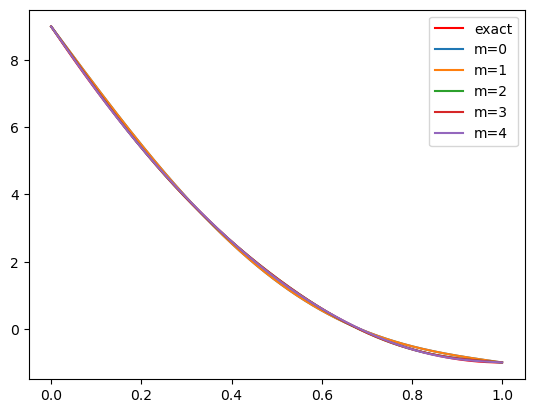

In [9]:
x = sym.Symbol('x')
f = 10*(x-1)**2 - 1
f0 = 9
f1 = -1
B = f0*(1-x) + x*f1
Omega = [0, 1]

f_sym = sym.lambdify(x, f, 'numpy')
resolution = 401
xcoor = np.linspace(Omega[0], Omega[1], resolution)
exact = f_sym(xcoor)
plt.plot(xcoor, exact, '-r', label='exact')
N = 5

psi = []
for n in range(N):
    psi.append(sym.sin(sym.pi * (n+1) * x))
    u, c = least_squares_orth_numeric(f=f-B, psi=psi, Omega=Omega)
    u_sym = sym.lambdify(x, u+B, modules='numpy')
    approx = u_sym(xcoor)    
    plt.plot(xcoor, approx, label='m={:}'.format(n))
plt.legend()